In [4]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Q5 (a)

In [5]:
# Initializing the parameters (domain length, no. of grid points and spacing)
L = 1.0 
N = 100  
h = L / N 

# Total fixed simulation time, and time step
T = 0.1  
dt = 0.001 
n_steps = int(T / dt) 
x = y = np.linspace(0, L, N+1)
X, Y = np.meshgrid(x, y)

# Initial condition
u = np.sin(2 * np.pi * X) * np.sin(2 * np.pi * Y)

for step in range(n_steps):
    # Solving for implicit step in x and y respectively
    alpha = dt / (2 * h**2)
    A = np.eye(N-1) * (1 + 2 * alpha)
    A_upper = np.eye(N-1, k=1) * (-alpha)
    A_lower = np.eye(N-1, k=-1) * (-alpha)
    A += A_upper + A_lower
    for j in range(1, N):
        u[1:N, j] = np.linalg.solve(A, u[1:N, j])

    A = np.eye(N-1) * (1 + 2 * alpha)
    A_upper = np.eye(N-1, k=1) * (-alpha)
    A_lower = np.eye(N-1, k=-1) * (-alpha)
    A += A_upper + A_lower
    for i in range(1, N):
        u[i, 1:N] = np.linalg.solve(A, u[i, 1:N])

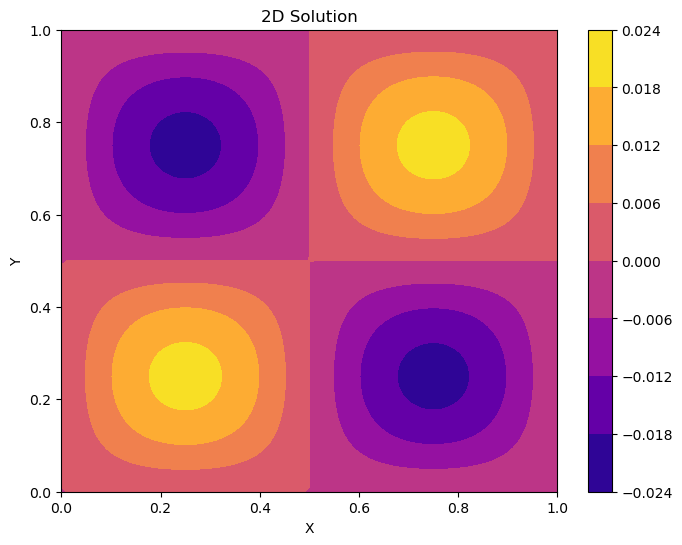

In [6]:
#2D Plot

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, u, cmap='plasma')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Solution')
plt.show()

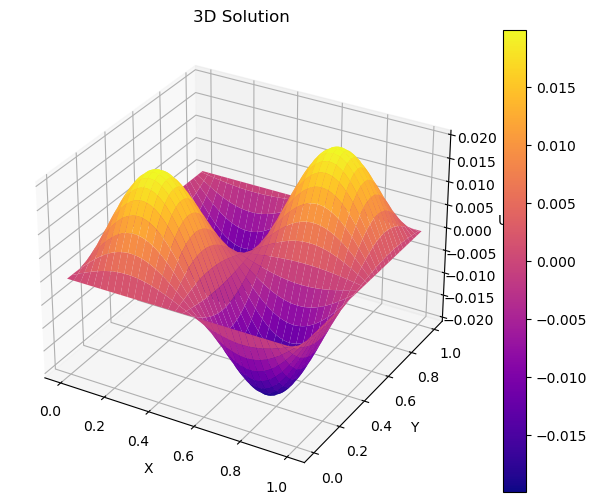

In [7]:
# 3D Plot

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u, cmap='plasma')
fig.colorbar(surf)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U')
ax.set_title('3D Solution')
plt.show()

# Q5 (b)

In [8]:
L = 1.0  
T = 0.1 
# Variable grid spacings
h_values = [0.01, 0.02, 0.05, 0.1]
def func(h):
    N = int(L / h)  # Number of grid points
    x = np.linspace(0, L, N+1)
    y = np.linspace(0, L, N+1)
    X, Y = np.meshgrid(x, y)
    u = np.sin(2 * np.pi * X) * np.sin(2 * np.pi * Y)
    
    alpha = T / 2
    n_steps = int(T / alpha)
    for step in range(n_steps):
        # Solving for implicit step in x and y respectively
        A_x = np.eye(N-1) * (1 + 2 * alpha)
        A_x_upper = np.eye(N-1, k=1) * (-alpha)
        A_x_lower = np.eye(N-1, k=-1) * (-alpha)
        A_x += A_x_upper + A_x_lower
        for j in range(1, N):
            u[1:N, j] = np.linalg.solve(A_x, u[1:N, j])
        
        A_y = np.eye(N-1) * (1 + 2 * alpha)
        A_y_upper = np.eye(N-1, k=1) * (-alpha)
        A_y_lower = np.eye(N-1, k=-1) * (-alpha)
        A_y += A_y_upper + A_y_lower
        for i in range(1, N):
            u[i, 1:N] = np.linalg.solve(A_y, u[i, 1:N])
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, u, cmap='plasma')
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Solution at T={T} for h={h}')
    plt.show()
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, u, cmap='plasma')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('U')
    ax.set_title(f'3D Solution at T={T} for h={h}')
    plt.show()

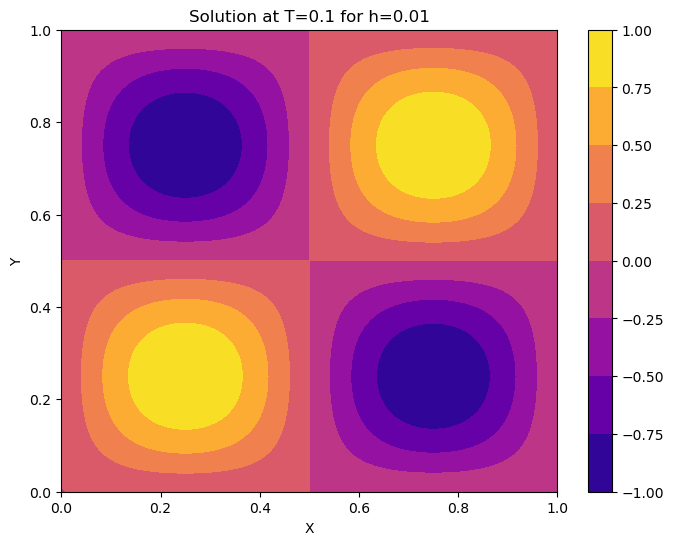

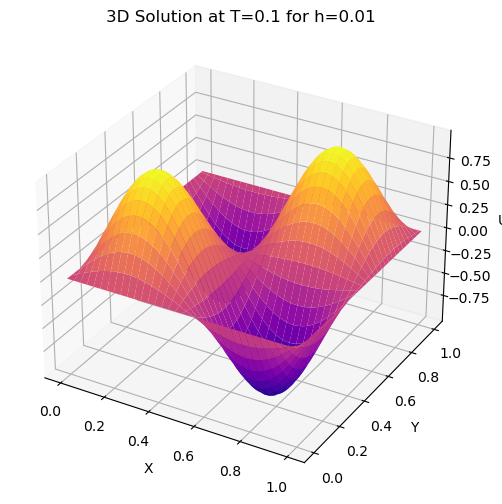

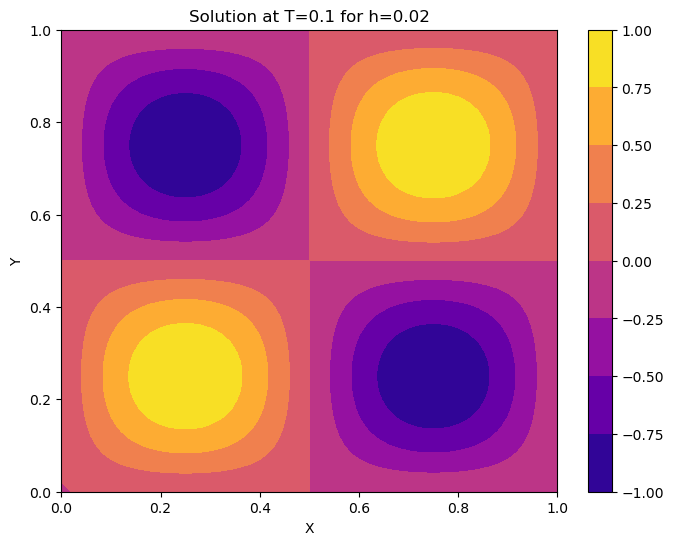

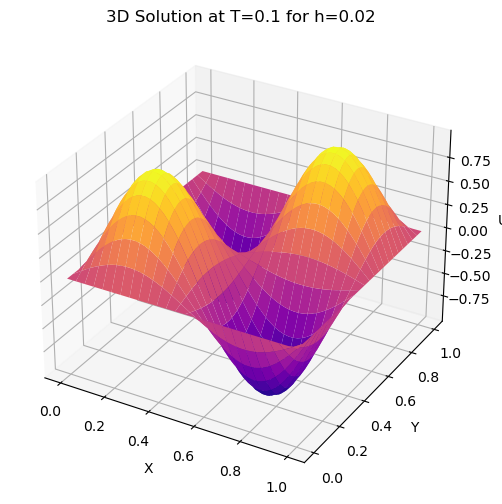

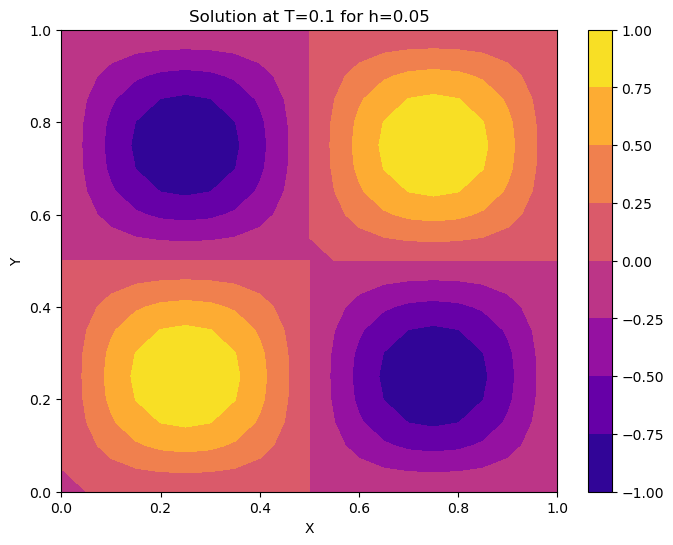

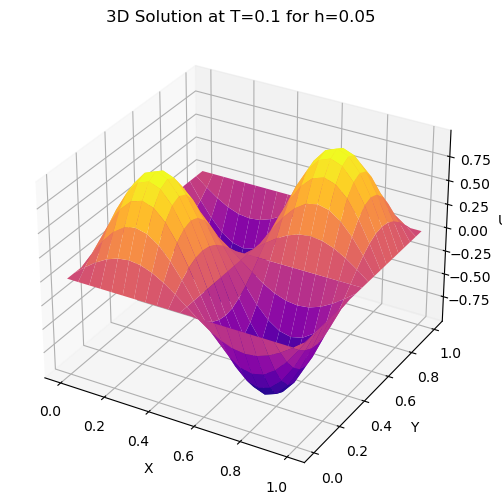

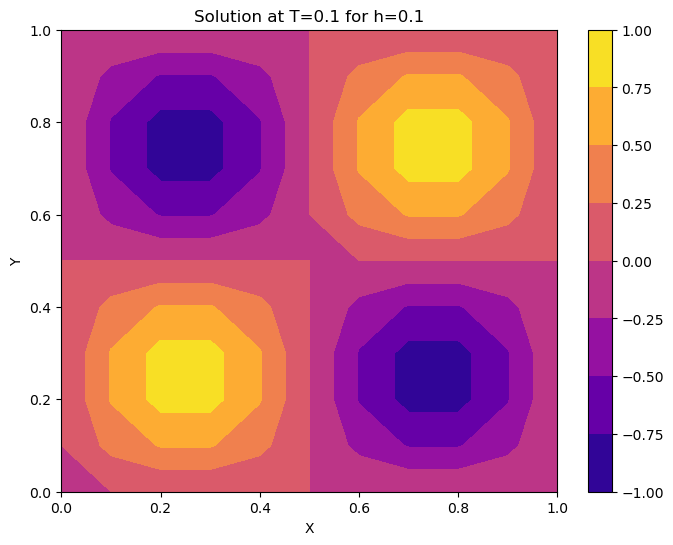

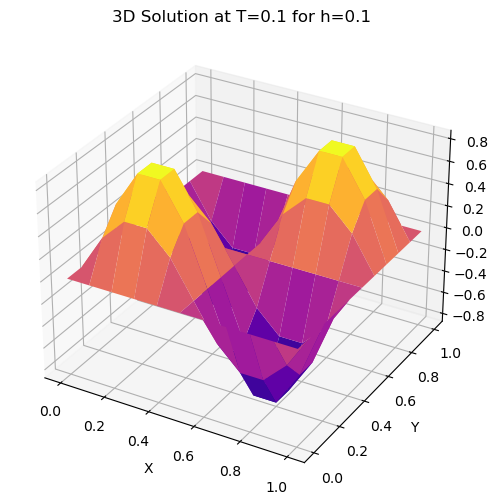

In [9]:
#2D and 3D Plots
for h in h_values:
    func(h)    

# Q5 (c)

In [10]:
# Defining the numerical and exact solutions
u = lambda x,y: (np.sin(2*np.pi*x))*(np.sin(2*np.pi*y))
u_exact = lambda x,y,t: u(x,y)*np.exp((-8*np.pi*np.pi*t))

# Defining all methods
def build_Dxx (n):
    nn = n*n
    h = 1/(n+1)
    hfac = 1/(h*h)
    Dxx = np.zeros ((nn,nn))
    for i in range (n):
        for j in range (n):
            ij = n*j + i
            Dxx[ij, ij] = -2*hfac
            if (j>0): Dxx[ij, ij-n] = hfac
            if (j<n-1): Dxx[ij, ij+n] = hfac
    return Dxx

def build_Dyy (n):
    nn = n*n
    h = 1/(n+1)
    hfac = 1/(h*h)
    Dyy = np.zeros ((nn,nn))
    for i in range (n):
        for j in range (n):
            ij = n*j + i
            Dyy[ij, ij] = -2*hfac
            if (i>0): Dyy[ij, ij-1] = hfac
            if (i<n-1): Dyy[ij, ij+1] = hfac
    return Dyy

def initialize_u(n):
    nn = n*n
    h = 1/(n+1)
    uu = np.zeros(nn)
    for i in range (n):
        y = (i+1)*h
        for j in range (n):
            ij = j*n + i
            x = (j+1)*h
            uu[ij] = u(x,y)
    return uu

def find_u_exact(n, t):
    nn = n*n
    h = 1/(n+1)
    uu = np.zeros(nn)
    for i in range (n):
        y = (i+1)*h
        for j in range (n):
            ij = j*n + i
            x = (j+1)*h
            uu[ij] = u_exact(x,y,t)
    return uu

def err(U, n):
    h = 1/(n+1)
    sq_err = (h**2)*np.dot(U,U)
    return np.sqrt(sq_err)

In [11]:
# Initializing all parameters
T = 0.005

N = [50,40,30,20,10]
E = []
H = [1/(n+1) for n in N]

for n in N:
    h = 1/(n+1)
    k = h/40
    u_n = initialize_u(n)
    Dxx = (k/2)*build_Dxx(n)
    Dyy = (k/2)*build_Dyy(n)
    I = np.diag(np.ones(n*n))
    m1 = I + Dyy
    m2 = I - Dxx
    m3 = I + Dxx
    m4 = I - Dyy
    t = 0

    while (t < T):
        m1u_n = np.dot(m1,u_n)
        u_star = np.linalg.solve(m2,m1u_n)
        m3u_star = np.dot(m3,u_star)
        u_np1 = np.linalg.solve(m4,m3u_star)

        t += k
        u_n = u_np1

    uu_np1 = find_u_exact(n, t)
    E.append(err((uu_np1 - u_np1), n))

for i in range (len(H)):
    print ("%3.6f %3.6f" %(H[i],E[i]))

0.019608 0.000172
0.024390 0.000268
0.032258 0.000476
0.047619 0.001068
0.090909 0.004158


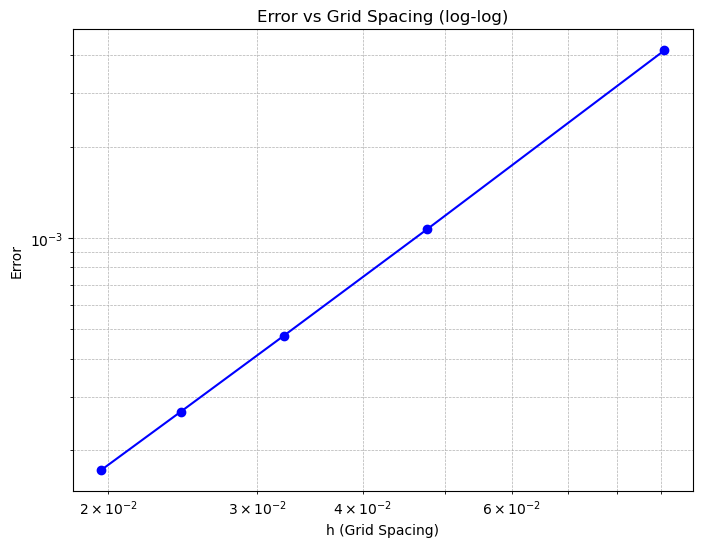

          h     Error
0  0.019608  0.000172
1  0.024390  0.000268
2  0.032258  0.000476
3  0.047619  0.001068
4  0.090909  0.004158


In [13]:
import pandas as pd
# Plotting the error
plt.figure(figsize=(8, 6))
plt.loglog(H, E, marker='o', linestyle='-', color='b')
plt.xlabel('h (Grid Spacing)')
plt.ylabel('Error')
plt.title('Error vs Grid Spacing (log-log)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()
data = {'h': H, 'Error': E}
ndf = pd.DataFrame(data)
print(ndf)